In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import tensorflow as tf
import sys
import seaborn as sns
import scipy
import h5py
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale
from tensorflow import keras
import random

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 100)

from keras import backend as K
K.clear_session()
tf.compat.v1.reset_default_graph()
os.environ['CUDA_VISIBLE_DEVICES']='0'
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

In [2]:
Total_Data_add_Gender = np.load('./Data/Total_Data_After_Preprocessing.npy')
Cal_Total_Data_add_Gender = np.load('./Data/Cal_Total_Data_After_Preprocessing.npy')

Total_Data_Gender = np.load('./Data/Total_Data_Gender.npy')
Cal_Total_Data_Gender = np.load('./Data/Cal_Total_Data_Gender.npy')

Total_Data_Label = np.load('./Data/Total_Data_Label.npy')
Cal_Total_Data_Label = np.load('./Data/Cal_Total_Data_Label.npy')

print('Full_Data_shape : ', Total_Data_add_Gender.shape, 'Cal_Full_Data_Shape : ', Cal_Total_Data_add_Gender.shape)
print('Gender_shape : ', Total_Data_Gender.shape, 'Cal_Gender_shape : ', Cal_Total_Data_Gender.shape)

Full_Data_shape :  (1042, 10) Cal_Full_Data_Shape :  (1042, 10)
Gender_shape :  (1042,) Cal_Gender_shape :  (1042,)


In [3]:
Full_Data_Set_v = []
Full_Data_Label_v = []

Train_Data_Set = []
Train_Data_Label = []
valid_Data_Set = []
valid_Data_Label = []
Test_Data_Set = []
Test_Data_Label = []

for i in range(len(Total_Data_add_Gender)):
    Full_Data_Set_v.append(Total_Data_add_Gender[i])
    Full_Data_Set_v.append(Cal_Total_Data_add_Gender[i])
    
    Full_Data_Label_v.append(Total_Data_Label[i])
    Full_Data_Label_v.append(Cal_Total_Data_Label[i])
    
Full_Data_Set_v = np.array(Full_Data_Set_v)
Full_Data_Label_v = np.array(Full_Data_Label_v)

print('Train : ', Full_Data_Set_v.shape, 'Label : ', Full_Data_Label_v.shape)

Train :  (2084, 10) Label :  (2084,)


In [4]:
Full_Data_Label_Test = []

for value1 in Full_Data_Label_v:
    if value1 == 0:
        _temp_ = [0, 1]
        Full_Data_Label_Test.append(_temp_)
    else :
        _temp_ = [1, 0]
        Full_Data_Label_Test.append(_temp_)
        
Full_Data_Label_Test = np.array(Full_Data_Label_Test)
Full_Data_Label_Test.shape

Full_Data_Label_v = Full_Data_Label_Test

Full_Data_Label_Test.shape

(2084, 2)

In [5]:
Train_Data, valid_Data, Test_Data = Full_Data_Set_v[:1600], Full_Data_Set_v[1600:1880], Full_Data_Set_v[1880:]
Train_Data_Label, valid_Data_Label, Test_Data_Label = Full_Data_Label_Test[:1600], Full_Data_Label_Test[1600:1880], Full_Data_Label_Test[1880:]

print('Train_Data_shape : ', Train_Data.shape, 'valid_Data_shape : ', valid_Data.shape, 'Test_Data_shape : ', Test_Data.shape)
print('Train_Data_Label_shape : ', Train_Data_Label.shape, 'valid_Data_Label_shape : ', valid_Data_Label.shape, 'Test_Data_Label_shape : ', Test_Data_Label.shape)

Train_Data_shape :  (1600, 10) valid_Data_shape :  (280, 10) Test_Data_shape :  (204, 10)
Train_Data_Label_shape :  (1600, 2) valid_Data_Label_shape :  (280, 2) Test_Data_Label_shape :  (204, 2)


In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, input_shape = [10]),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dropout(0.3),   
    
    keras.layers.Dense(60),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dropout(0.3), 
    
    keras.layers.Dense(30),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(2, activation = 'sigmoid') 
])

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
history = model.fit(Train_Data, Train_Data_Label, epochs = 200, validation_data = (valid_Data, valid_Data_Label))

Epoch 1/200
50/50 [==============================] - 0s 5ms/step - loss: 0.8009 - accuracy: 0.5125 - val_loss: 0.6884 - val_accuracy: 0.5429
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.5600 - val_loss: 0.6723 - val_accuracy: 0.5857
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.5638 - val_loss: 0.6658 - val_accuracy: 0.5893
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5925 - val_loss: 0.6586 - val_accuracy: 0.6250
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5981 - val_loss: 0.6542 - val_accuracy: 0.6357
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5800 - val_loss: 0.6482 - val_accuracy: 0.6250
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5725 - val_loss: 0.6507 - val_accuracy: 0.6286
Epoch 8/200
5

Epoch 59/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6338 - val_loss: 0.6378 - val_accuracy: 0.6321
Epoch 60/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.6313 - val_loss: 0.6398 - val_accuracy: 0.6286
Epoch 61/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6388 - val_loss: 0.6407 - val_accuracy: 0.6214
Epoch 62/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6306 - val_loss: 0.6403 - val_accuracy: 0.6250
Epoch 63/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6231 - val_loss: 0.6407 - val_accuracy: 0.6357
Epoch 64/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6388 - val_loss: 0.6386 - val_accuracy: 0.6321
Epoch 65/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6344 - val_loss: 0.6355 - val_accuracy: 0.6393
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6413 - val_loss: 0.6334 - val_accuracy: 0.6429
Epoch 174/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6400 - val_loss: 0.6350 - val_accuracy: 0.6321
Epoch 175/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6525 - val_loss: 0.6350 - val_accuracy: 0.6250
Epoch 176/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6419 - val_loss: 0.6361 - val_accuracy: 0.6286
Epoch 177/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6463 - val_loss: 0.6381 - val_accuracy: 0.6250
Epoch 178/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6444 - val_loss: 0.6355 - val_accuracy: 0.6357
Epoch 179/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6363 - val_loss: 0.6375 - val_accuracy: 0.6214
Epoch 180/200

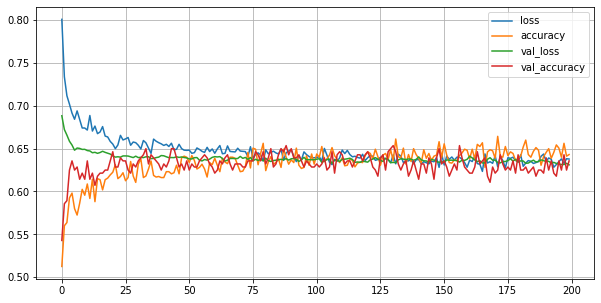

In [9]:
pd.DataFrame(history.history).plot(figsize = (10, 5))
plt.grid(True)
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(Test_Data, Test_Data_Label, verbose=1)
print('test_loss : ', test_loss, 'test_acc : ', test_acc)

7/7 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.6569
test_loss :  0.6047713756561279 test_acc :  0.656862735748291


In [30]:
pre_data = model.predict(Test_Data)

In [39]:
print('Test_Data_Label : ', Test_Data_Label[:3])
print('pre_data : ', pre_data[:20])

Test_Data_Label :  [1 1 0]
pre_data :  [[0.6452007  0.3552949 ]
 [0.5599198  0.44068947]
 [0.26152927 0.73894167]
 [0.2651062  0.73485875]
 [0.4451041  0.55394673]
 [0.67574    0.32545143]
 [0.5954612  0.40430278]
 [0.47431195 0.5267357 ]
 [0.38656363 0.61423063]
 [0.35911876 0.64175445]
 [0.54091775 0.45931804]
 [0.5709475  0.42868966]
 [0.1994105  0.8021781 ]
 [0.34051374 0.6599614 ]
 [0.21346906 0.7870005 ]
 [0.3092596  0.69086206]
 [0.31071505 0.6887791 ]
 [0.30384827 0.6964382 ]
 [0.6734045  0.32516354]
 [0.59436953 0.40589467]]


In [32]:
test_result = []

for i, val in enumerate (pre_data):
    if val[0] > val[1]:
        test_result.append(0)
    else:
        test_result.append(1)
        
Test_Data_Label = Test_Data_Label[:, -1]

In [33]:
print('Test_Data_Label : ', Test_Data_Label[:10])
print('test_result : ', test_result[:10])

Test_Data_Label :  [1 1 0 0 1 1 0 0 1 1]
test_result :  [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]


In [34]:
con_matrix_ = tf.math.confusion_matrix(
    Test_Data_Label, test_result, num_classes=None, weights=None, dtype=tf.dtypes.int32, name=None)

TP = con_matrix_[0][0]
FN = con_matrix_[0][1]
FP = con_matrix_[1][0]
TN = con_matrix_[1][1]

print('\n',
      'TP :', TP, '\n', 
      'FN :', FN, '\n', 
      'FP :', FP, '\n', 
      'TN :', TN, '\n')

Accuracy = (TP+TN)/(TP+FN+FP+TN)
print('Accuracy : ', '{:.4f}'.format(Accuracy))

Error_rate = (FP+FN)/(TP+FN+FP+TN)
print('Error_rate : ', '{:.4f}'.format(Error_rate))

Precirion = TP/(TP+FP)
print('Precirion : ', '{:.4f}'.format(Precirion))

Recall = TP/(TP+FN) 
print('Recall : ', '{:.4f}'.format(Recall))


 TP : tf.Tensor(72, shape=(), dtype=int32) 
 FN : tf.Tensor(30, shape=(), dtype=int32) 
 FP : tf.Tensor(34, shape=(), dtype=int32) 
 TN : tf.Tensor(68, shape=(), dtype=int32) 

Accuracy :  0.6863
Error_rate :  0.3137
Precirion :  0.6792
Recall :  0.7059


In [1]:
Acc = 0.6863
pree = 0.6792
rec = 0.7059

In [2]:
mul = pree * rec
addd = pree + rec

In [3]:
dataa = mul / addd * 2
dataa = dataa

In [6]:

print('Accuracy : ', Acc)
print('Precirion : ', pree)
print('Recall : ', rec)
print('F1 - Score : ', dataa)

Accuracy :  0.6863
Precirion :  0.6792
Recall :  0.7059
F1 - Score :  0.6922926575698505


In [42]:
np.save('C:/Users/82107/Desktop/python/Classification_model_accuracy', Accuracy)

In [35]:
tpr_score = TP/(TP+FN)
fpr_score = FP/(FP+TN)

tpr = tpr_score
fpr = fpr_score

print('tpr : ', tpr, 'fpr : ', fpr)

tpr :  tf.Tensor(0.7058823529411765, shape=(), dtype=float64) fpr :  tf.Tensor(0.3333333333333333, shape=(), dtype=float64)


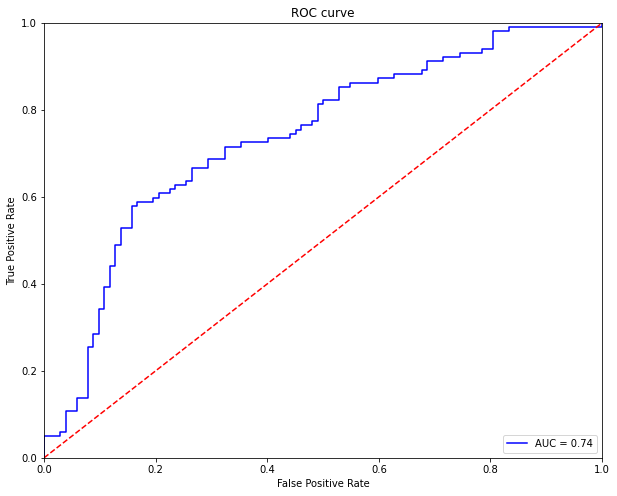

In [36]:
import sklearn.metrics as metrics
probs = model.predict(Test_Data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Test_Data_Label, preds)
roc_auc = metrics.auc(fpr, tpr)



import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
Sepsis_persent = []

for i, value in enumerate(pre_data):
    Sepsis_persent.append(value[1])
    
Sepsis_persent = np.array(Sepsis_persent)
Sepsis_persent_pd = pd.DataFrame(Sepsis_persent)
Sepsis_persent_pd.head(20)

,0
0,0.355295
1,0.440689
2,0.738942
3,0.734859
4,0.553947
5,0.325451
6,0.404303
7,0.526736
8,0.614231
9,0.641754


In [21]:
del model

In [38]:
model.save("C:/Users/82107/Desktop/python/Classification_model/")
print("Saved model to disk")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/82107/Desktop/python/Classification_model/assets
Saved model to disk
